In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
digits = load_digits()
img = digits.images
img  = img.reshape(1797,64)

In [3]:
n,d = img.shape
k = 10
print(n,d,k)

1797 64 10


K-Means

In [4]:
centroids = img[np.random.choice(n, k, replace=False)]

max_iter = 100
obj_val_list = []
for _ in range(max_iter):
  distances = np.zeros((n, k))
  for i in range(n):
    for j in range(k):
      distances[i][j] = np.linalg.norm(img[i,:] - centroids[j])
  labels = np.argmin(distances, axis = 1 )
  obj_val = np.sum(np.amin(distances,axis=1)**2)
  obj_val_list.append(obj_val)
  for j in range(k):
    centroids[j] = np.mean(img[labels == j], axis = 0)

In [5]:
labels_indices = dict()
for j in range(k):
    labels_indices[j] = [i for i in range(len(labels)) if labels[i] == j]

Clusters of images formed


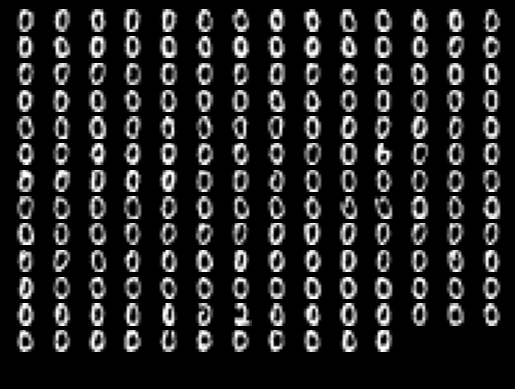

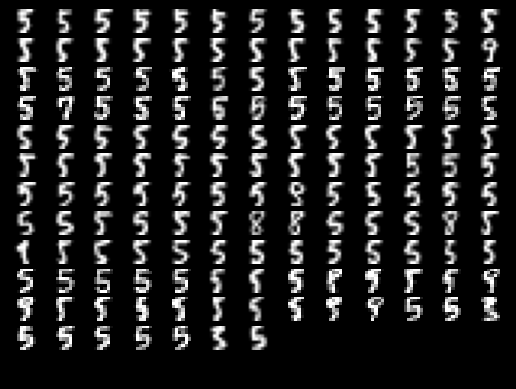

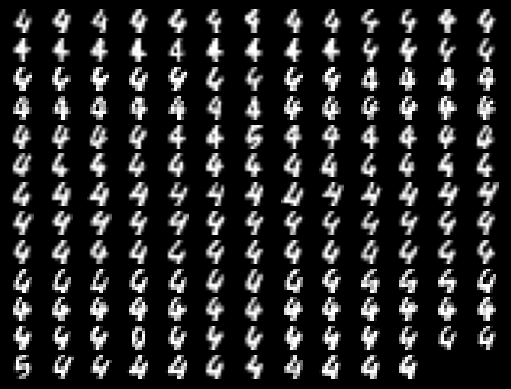

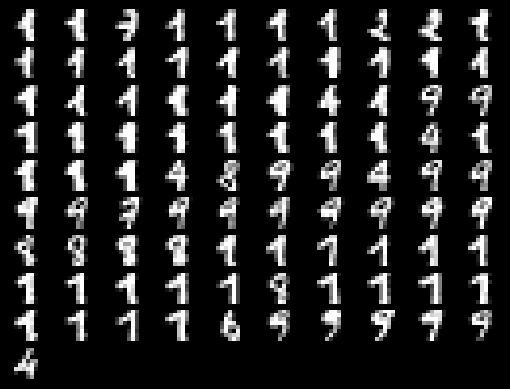

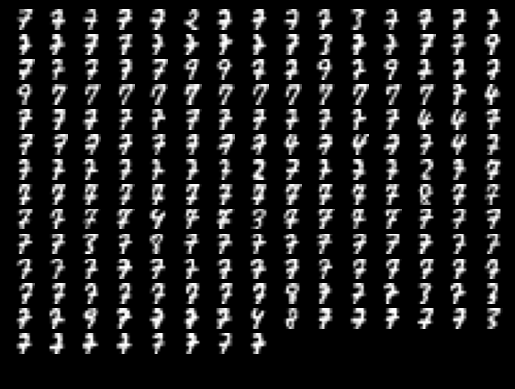

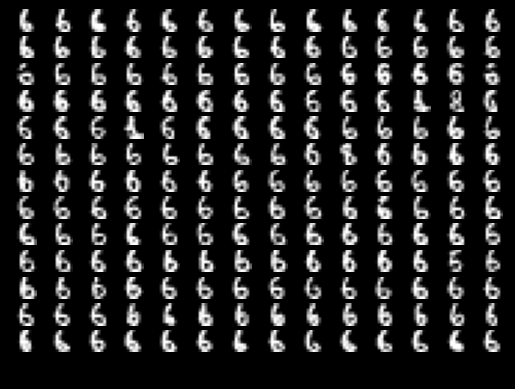

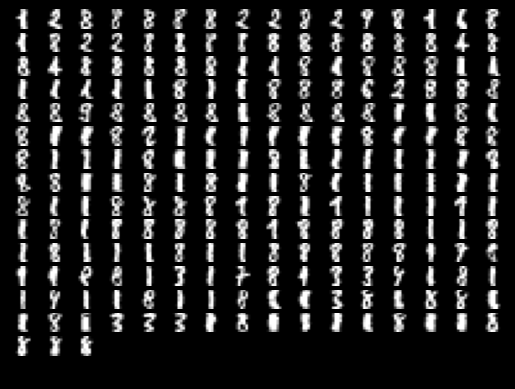

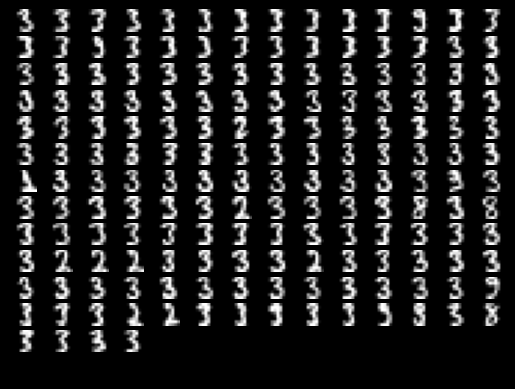

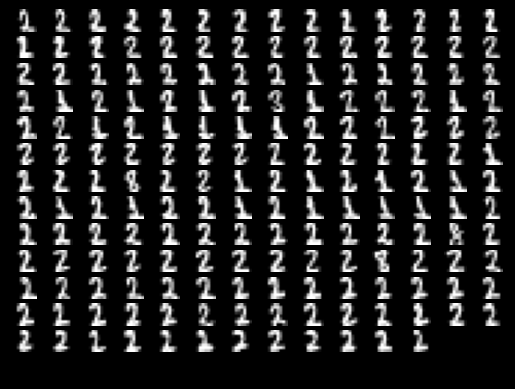

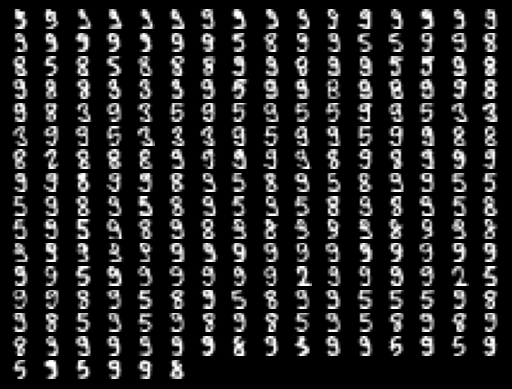

In [6]:
print('Clusters of images formed')
for j in range(k):
    num_images = len(labels_indices[j])
    num_rows = num_cols = int(num_images**0.5)+1
    fig, axes = plt.subplots(num_rows, num_cols)
    fig.set_facecolor('black')
    axes = axes.ravel()
    for i in range(num_images):
        axes[i].imshow(img[labels_indices[j][i]].reshape(8,8),cmap='gray')
    for ax in axes.flat:
        ax.axis('off')
    plt.show()  

Images corresponding to Centers of 10 Clusters


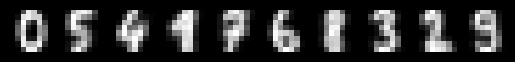

In [7]:
fig,ax = plt.subplots(1,k)
fig.set_facecolor('black')
print('Images corresponding to Centers of 10 Clusters')
for i in range(k):
    plt.subplot(1,k,i+1)
    plt.imshow(centroids[i].reshape(8,8),cmap='gray')
    plt.axis('off')
plt.show()

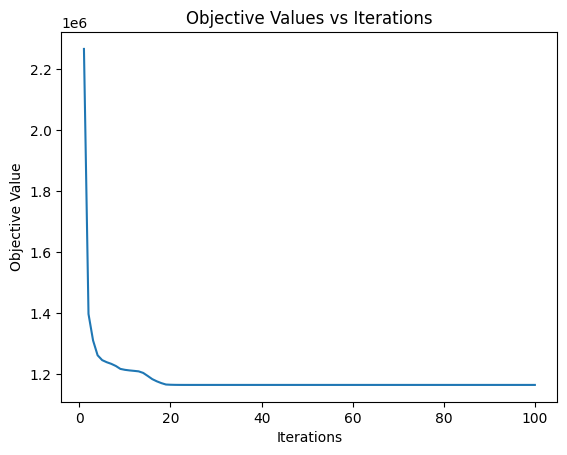

In [8]:
plt.plot(range(1,max_iter+1),obj_val_list)
plt.title('Objective Values vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Objective Value')
plt.show()

K-Centers

In [9]:
def generateDistances(points,centers):
    a = points.shape[0]
    b = centers.shape[0]
    distance = np.zeros((a,b))
    for i in range(a):
        for j in range(b):
            distance[i][j] = np.linalg.norm(points[i]-centers[j])
    return distance

In [10]:
def findNextCenter(points,centers):
    a = points.shape[0]
    distance = generateDistances(points,centers)
    closest_center_distances = np.amin(distance,axis=1)
    dmax = np.max(closest_center_distances)
    for i in range(a):
        if dmax == closest_center_distances[i]:
            return points[i]

In [11]:
def formClusters(points,centers):
    a = points.shape[0]
    b = centers.shape[0]
    distance = generateDistances(points,centers)
    closest_center_distances = np.amin(distance,axis=1)
    dmax = np.max(closest_center_distances)
    closest_center_distances_indices = np.argmin(distance,axis=1)
    return closest_center_distances_indices,dmax

In [12]:
iter = 1
for j in range(iter):
    c0 = img[np.random.randint(0,n)]
    centers = np.zeros((k,d))
    centers[0]=c0
    for i in range(1,k):
        cnew = findNextCenter(img,centers[:i,:])
        centers[i] = cnew
    labels_k_centers,cost = formClusters(img,centers)

In [13]:
print(f'Objective Value of K-Centers after termination: {cost}')

Objective Value of K-Centers after termination: 51.30302135352264


In [14]:
labels_indices = dict()
for j in range(k):
    labels_indices[j] = [i for i in range(len(labels_k_centers)) if labels_k_centers[i] == j]

Clusters of images formed


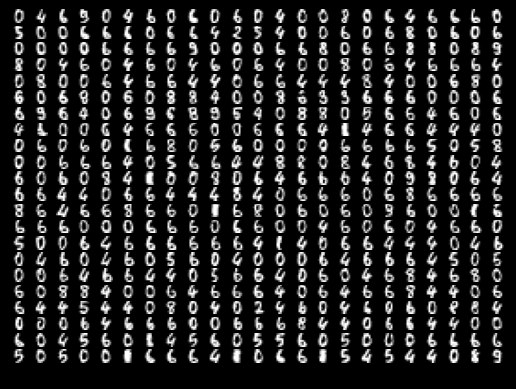

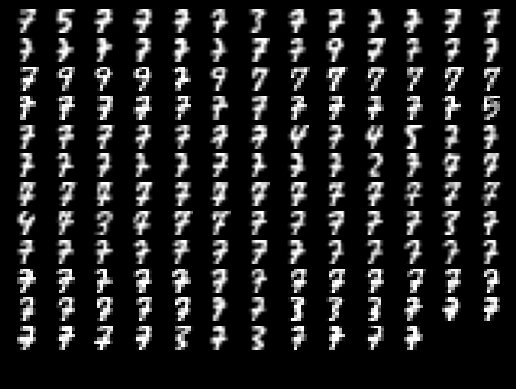

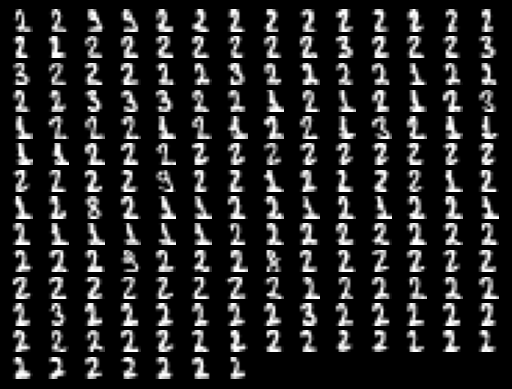

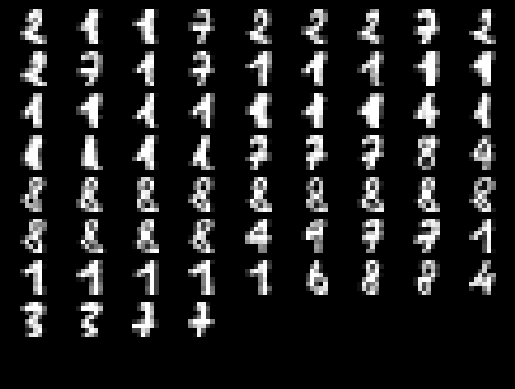

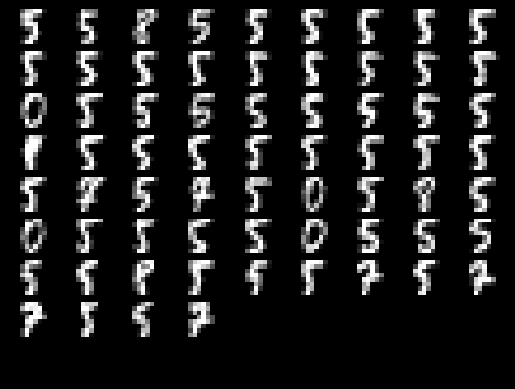

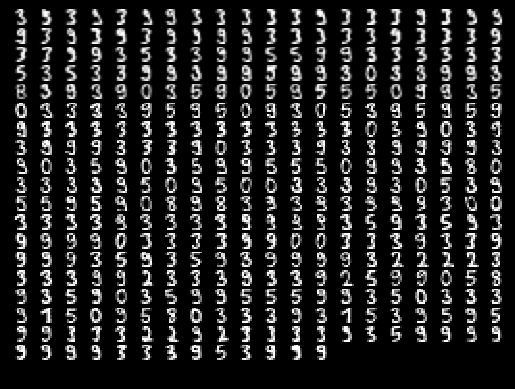

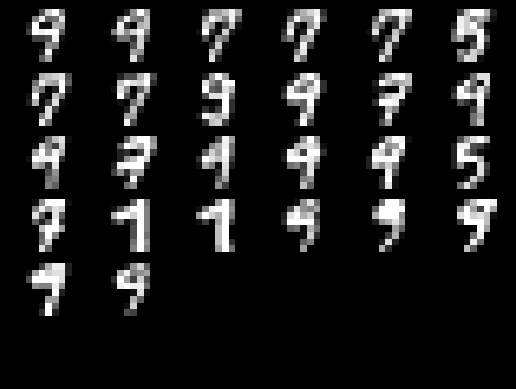

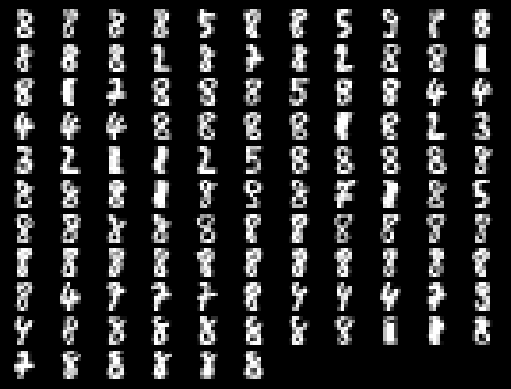

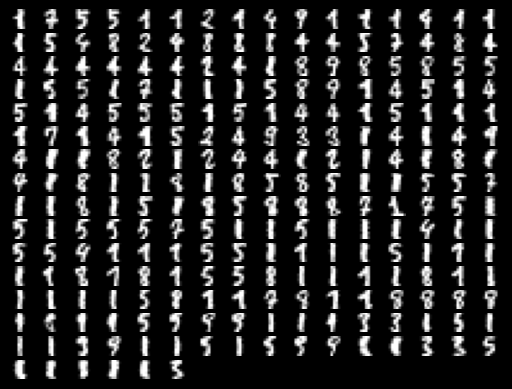

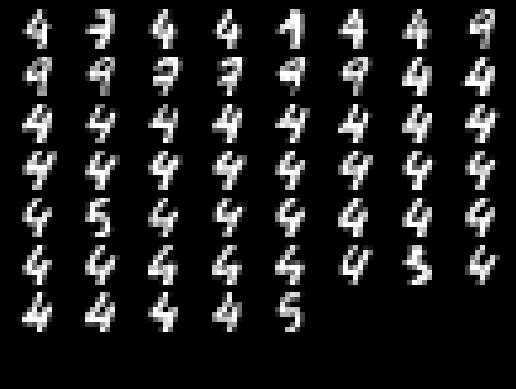

In [15]:
print('Clusters of images formed')
for j in range(k):
    num_images = len(labels_indices[j])
    num_rows = num_cols = int(num_images**0.5)+1
    fig, axes = plt.subplots(num_rows, num_cols)
    fig.set_facecolor('black')
    axes = axes.ravel()
    for i in range(num_images):
        axes[i].imshow(img[labels_indices[j][i]].reshape(8,8),cmap='gray')
    for ax in axes.flat:
        ax.axis('off')
    plt.show()  

Images corresponding to Centers of 10 Clusters


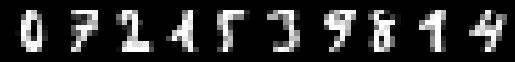

In [16]:
fig,ax = plt.subplots(1,k)
fig.set_facecolor('black')
print('Images corresponding to Centers of 10 Clusters')
for i in range(k):
    plt.subplot(1,k,i+1)
    plt.imshow(centers[i].reshape(8,8),cmap='gray')
    plt.axis('off')
plt.show()

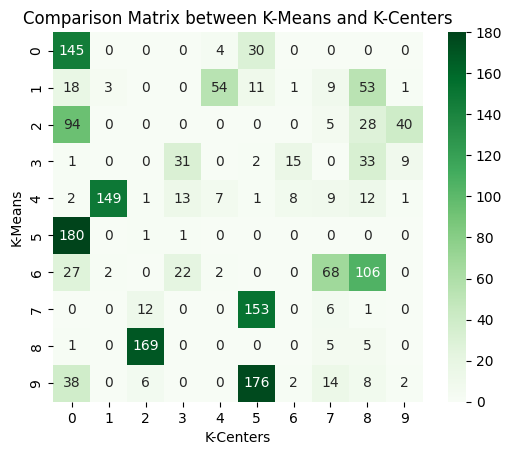

In [17]:
comparison = confusion_matrix(labels,labels_k_centers)
sns.heatmap(comparison,square=True,cmap='Greens',cbar=True,annot=True,fmt='d')
plt.title('Comparison Matrix between K-Means and K-Centers')
plt.ylabel('K-Means')
plt.xlabel('K-Centers')
plt.show()